<a href="https://colab.research.google.com/github/aymash13/Ola_Driver_Churn_Prediction/blob/main/Ola_Driver_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Problem Statement:` Ola was facing sudden rise in driver atrition rate which was significantally effecting their operational efficiency and recruitment cost.

`Objective:`My objective is to find the pattern between the drivers who had left their job betweeen 2019 to 2021 and  Build and evaluate Machine learning models to predict driver attrition and provide insights for improving retention.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')

In [ ]:
df['Gender'].isnull().sum()

np.int64(52)

In [ ]:
df.head(10)

/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df=df.drop(['Unnamed: 0','MMM-YY','Driver_ID'], axis=1)

In [ ]:
df.isna().sum()

,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0
Grade,0
Total Business Value,0


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)

/tmp/ipython-input-870653270.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
/tmp/ipython-input-870653270.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [ ]:
df['Tenure_Days']=(df['LastWorkingDate']-df['Dateofjoining']).dt.days

In [ ]:
df["Tenure_Days"] = df["Tenure_Days"].fillna(
    (pd.to_datetime("2020-12-01") - pd.to_datetime(df["Dateofjoining"])).dt.days
).astype(int)

In [ ]:
df["Target"] = np.where(df["LastWorkingDate"].notna(), 1, 0)

In [ ]:
df=df.drop(['LastWorkingDate','Dateofjoining'], axis=1)

# Analysis

## Age

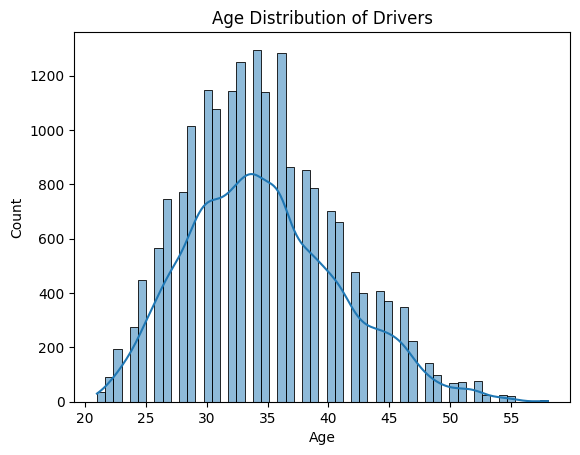

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Insight:The majority of drivers fall within the age range of 25 to 45, indicating that this age group constitutes the core workforce."

<Axes: xlabel='Age_Group', ylabel='count'>

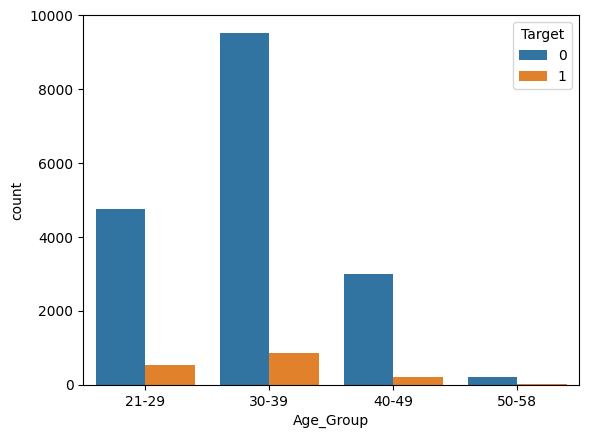

In [ ]:
bins = [20, 30, 40, 50, 60]
labels = ['21-29', '30-39', '40-49', '50-58']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

sns.countplot(data=df, x='Age_Group', hue='Target')

Insight: Drivers in the age groups 21–29 and 30–39 exhibit higher churn, indicating that younger and early-mid career drivers are more likely to leave the job.

## Gender

<Axes: xlabel='Gender', ylabel='count'>

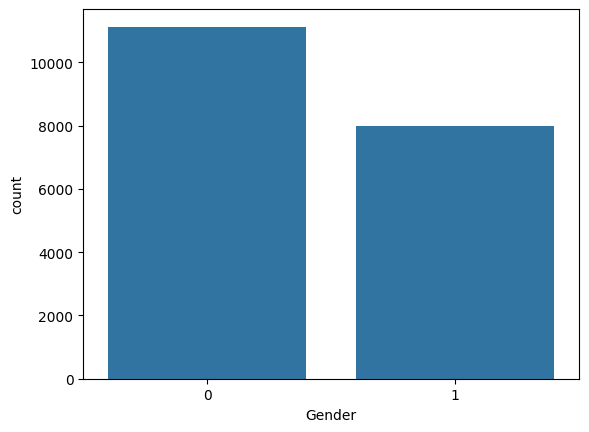

In [ ]:
sns.countplot(data=df,x=df['Gender'])

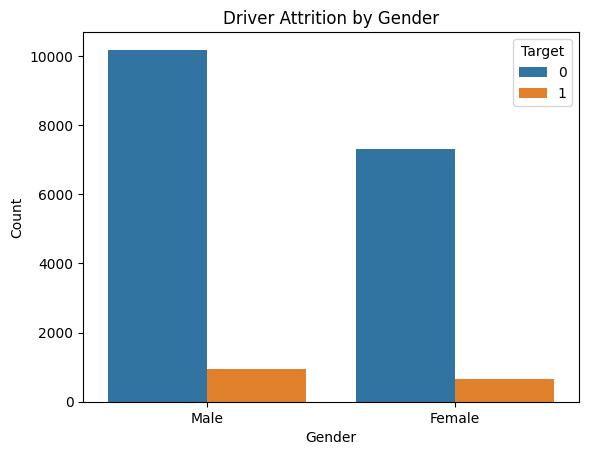

In [ ]:
sns.countplot(data=df, x='Gender', hue='Target')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

plt.title('Driver Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Insight:Driver churn shows little to no variation across genders, indicating gender is not a key determinant.

## City

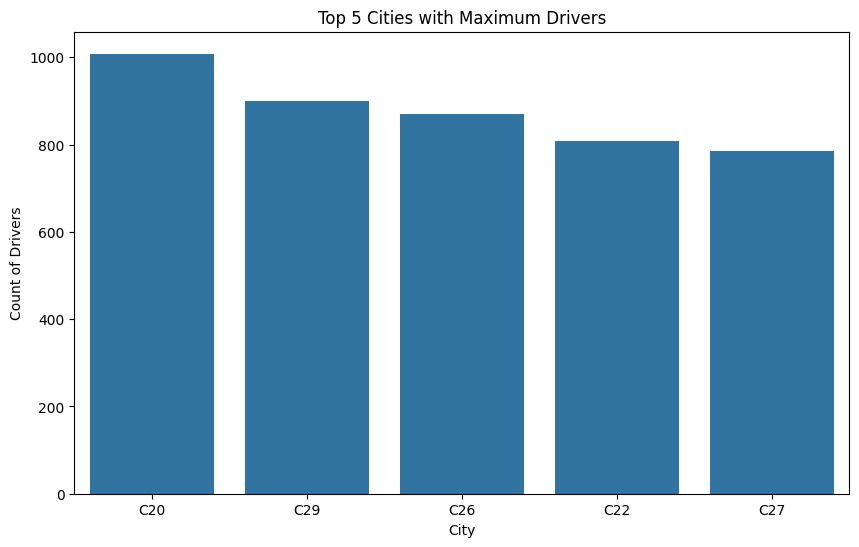

In [ ]:
plt.figure(figsize=(10,6))
top_5_cities = df['City'].value_counts().nlargest(5).index
sns.countplot(data=df[df['City'].isin(top_5_cities)], x='City',
              order=top_5_cities)
plt.title('Top 5 Cities with Maximum Drivers')
plt.xlabel('City')
plt.ylabel('Count of Drivers')
plt.show()

Insight: The distribution of drivers across cities shows that C20, C26, C29, C27, and C22 have the highest concentration of drivers compared to other locations.

In [ ]:
attrition_by_city = df[df['Target'] == 1]['City'].value_counts().head(5)

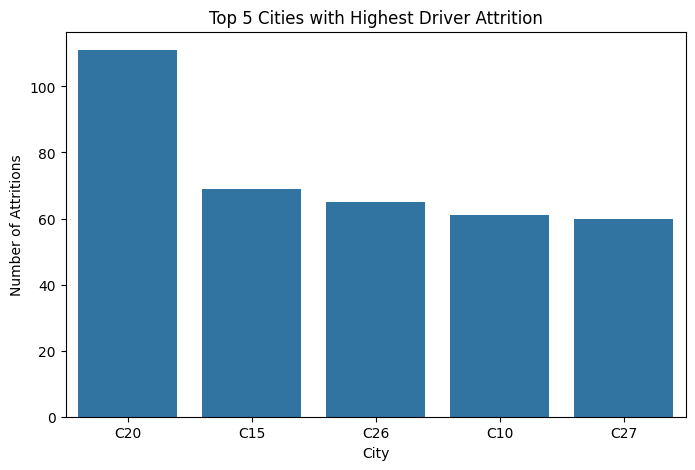

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_by_city.index, y=attrition_by_city.values)

plt.title("Top 5 Cities with Highest Driver Attrition")
plt.xlabel("City")
plt.ylabel("Number of Attritions")
plt.show()

There is a overlap between the two sets (C20, C26, C27).

This suggests that in some major hubs where most drivers are located, attrition is also high → meaning large workforce doesn’t guarantee stability.

On the other hand, cities like C29 and C22 have many drivers but not among the top attrition cities → these could be more stable locations.

Cities like C15 and C10 don’t have the largest driver base but still face high attrition → this indicates localized issues (e.g., lower incentives, higher competition, or operational challenges).

/tmp/ipython-input-2614008197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='Set2')


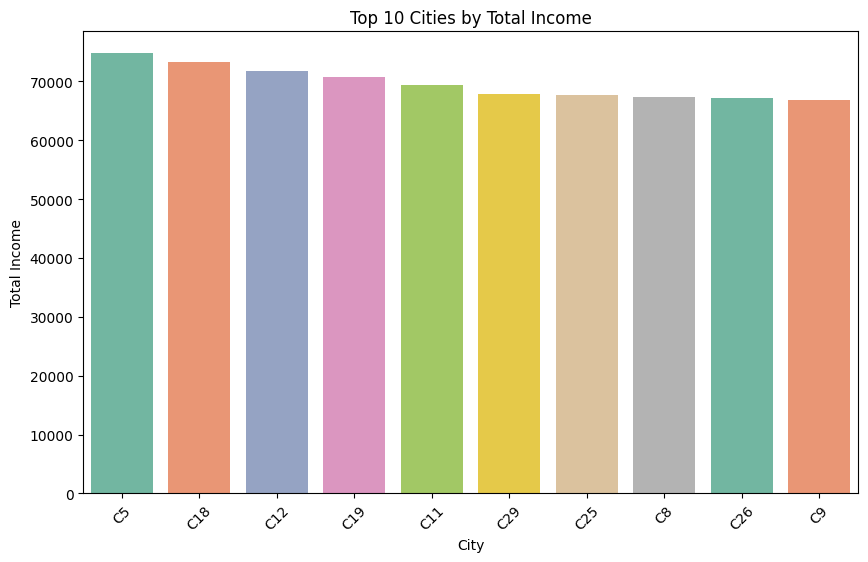

In [ ]:
top_cities = df.groupby('City')['Income'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Set2')
plt.title('Top 10 Cities by Total Income')
plt.xlabel('City')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()

Cities such as C20, C29, C26, C12, C27, C15, and C22 have the highest average driver income, indicating that location plays a significant role in earning potential. Drivers operating in these cities likely benefit from higher demand, more trips, or city-specific incentives

## Income

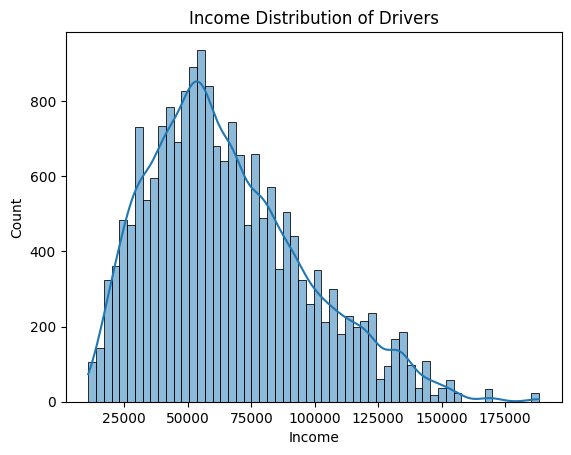

In [ ]:
sns.histplot(df['Income'],kde=True)
plt.title('Income Distribution of Drivers')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

Insight:Drivers' earnings mostly fall between ₹25,000 and ₹80,000, representing the typical income bracket.

<Axes: xlabel='Income_Group', ylabel='count'>

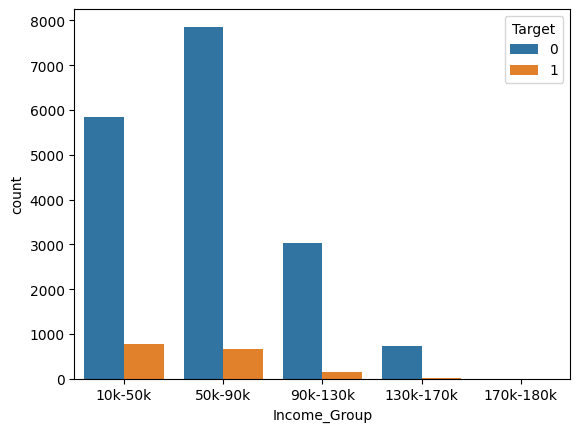

In [ ]:
bins = [10000, 50000, 90000, 130000, 170000, 180000]
labels = ['10k-50k', '50k-90k', '90k-130k', '130k-170k', '170k-180k']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)
sns.countplot(data=df, x='Income_Group', hue='Target')

Insight: Drivers with relatively income between (₹10,000–₹50,000) (₹50,000–₹90,000) exhibit a higher likelihood of churn, indicating that lower earnings are associated with increased attrition.

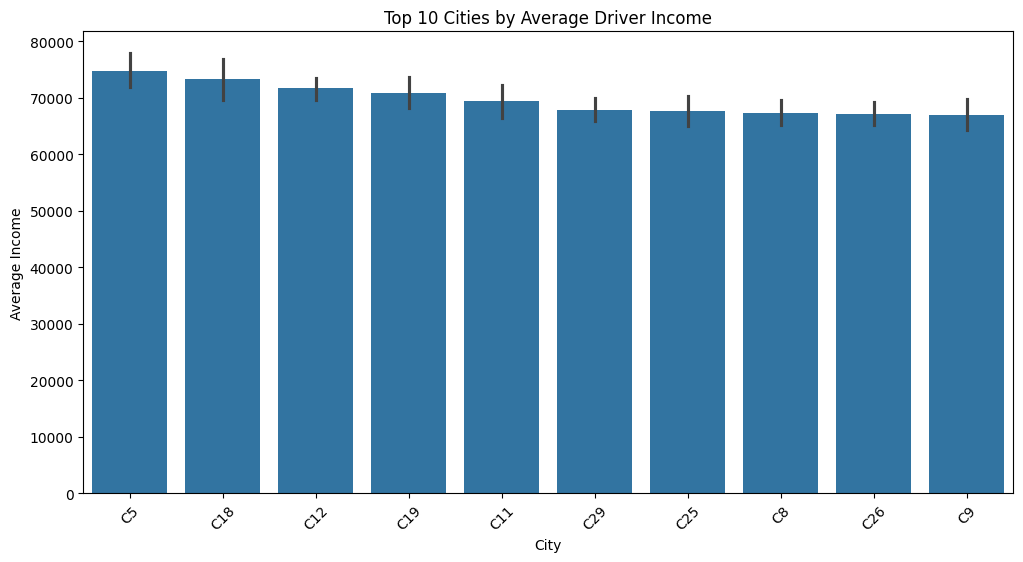

In [ ]:
income_by_city = df.groupby('City')['Income'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Income',
            data=df,
            estimator=np.mean,
            order=df.groupby('City')['Income'].mean().sort_values(ascending=False).index[:10])

plt.title("Top 10 Cities by Average Driver Income")
plt.xlabel("City")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.show()

C26, C29 appear both in high driver concentration list and high-income list → these cities not only attract many drivers but also provide relatively higher earnings.

This could indicate income is a pull factor for drivers.

Cities like C5, C18, C12, C19, C11:

These have high incomes but didn’t appear in high driver concentration or high attrition lists.

Possibly smaller markets with fewer drivers, but the ones working there earn more on average → maybe due to less competition and higher demand per driver.

## Education_Level

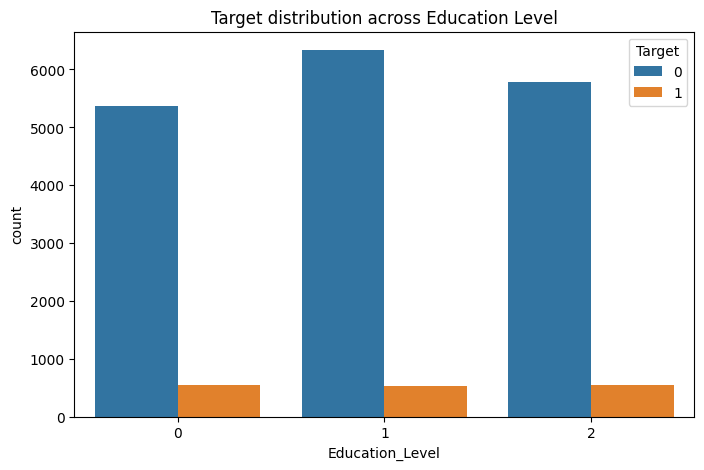

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education_Level', hue='Target')
plt.title("Target distribution across Education Level")
plt.show()

Education level does not appear to significantly influence driver churn.

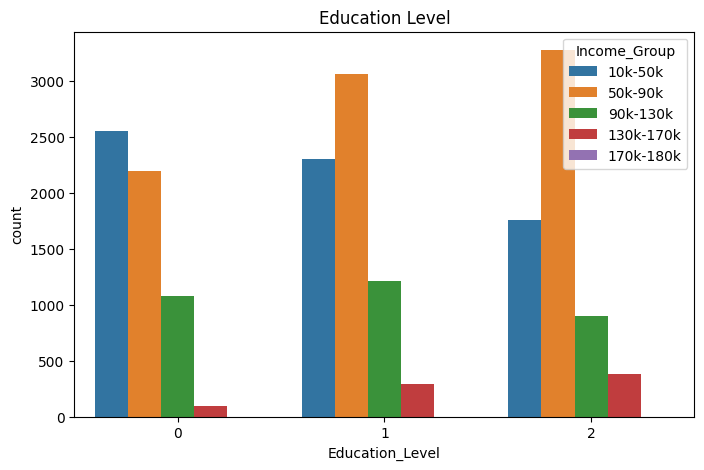

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education_Level', hue='Income_Group')
plt.title("Education Level")
plt.show()

Higher education Gurantees Higher Income for drivers in ola company

## Joining Designation

<Axes: xlabel='Joining Designation', ylabel='count'>

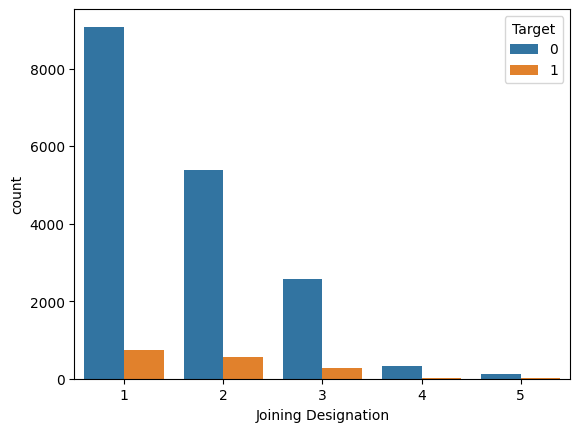

In [ ]:
sns.countplot(data=df, x='Joining Designation', hue='Target')

Insight: The Drivers who are newly joined are more likely to churn, indicating higher attrition among beginners or early-career drivers.

/tmp/ipython-input-2400357804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Joining Designation', y='Income',


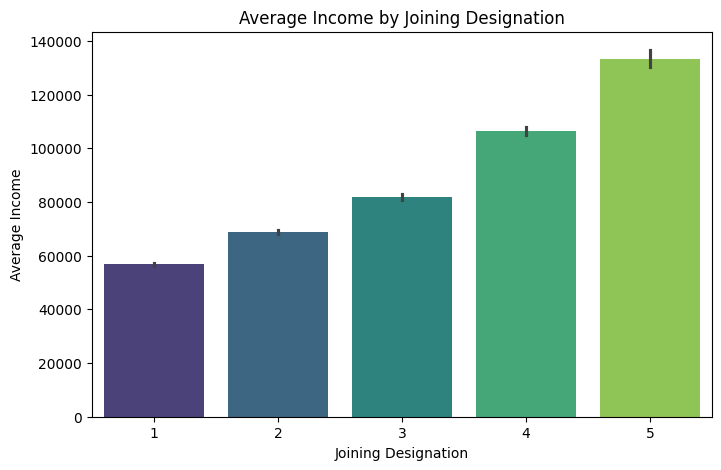

In [ ]:
income_by_designation = df.groupby('Joining Designation')['Income'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Joining Designation', y='Income',
            data=df, estimator=np.mean, palette="viridis")

plt.title("Average Income by Joining Designation")
plt.xlabel("Joining Designation")
plt.ylabel("Average Income")
plt.show()

The Income increases as Designation increases which reduces the posibilities of churn

## Grade

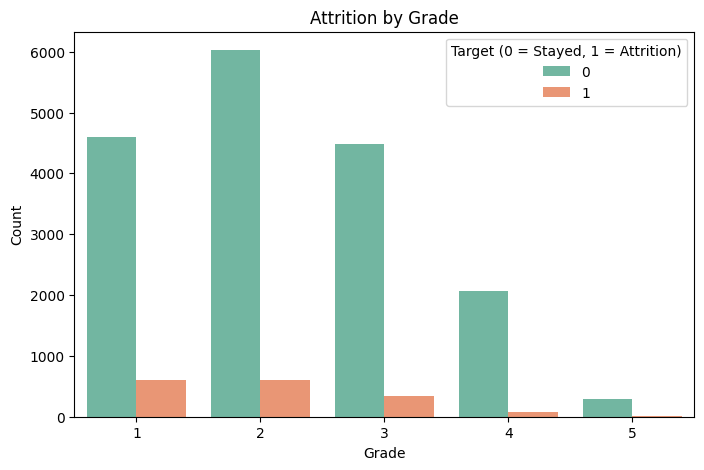

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Grade', hue='Target', palette="Set2")

plt.title("Attrition by Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="Target (0 = Stayed, 1 = Attrition)")
plt.show()

Higher attrition in lower grades:

Grades 1, 2, and 3 have the highest number of drivers leaving.

These are likely entry-level or mid-level positions, suggesting newer or less experienced drivers are more prone to leave.

Grade
5    137272.072131
4    109970.544776
3     81749.548695
2     57211.242191
1     39006.004229
Name: Income, dtype: float64


/tmp/ipython-input-2912204264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Grade', y='Income', data=df, estimator=np.mean, palette="coolwarm")


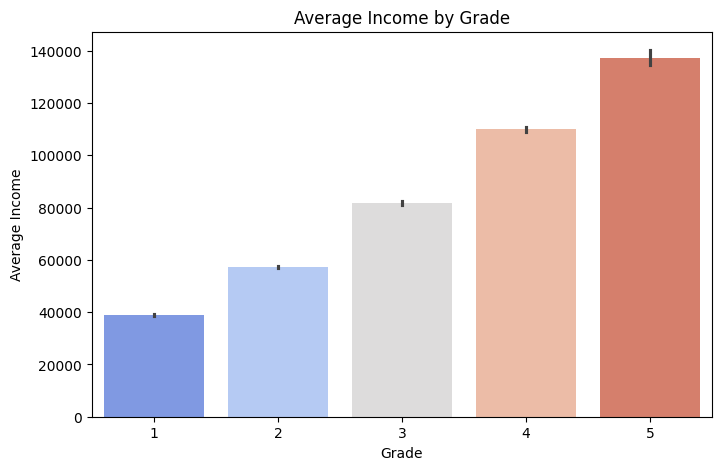

In [ ]:
income_by_grade = df.groupby('Grade')['Income'].mean().sort_values(ascending=False)
print(income_by_grade)
plt.figure(figsize=(8,5))
sns.barplot(x='Grade', y='Income', data=df, estimator=np.mean, palette="coolwarm")

plt.title("Average Income by Grade")
plt.xlabel("Grade")
plt.ylabel("Average Income")
plt.show()

Implication for attrition:

Lower-grade drivers have lower income → may contribute to higher attrition in Grades 1–3.

Retention strategies could target these lower-grade drivers through incentives, bonuses, or faster grade progression.

## Total Business Value

In [ ]:
bins = [-6000000, 0, 5000000, 15000000, 23550000]
labels = ['Loan', 'Low', 'Medium', 'High']
df['TBV_Group'] = pd.cut(df['Total Business Value'], bins=bins, labels=labels)

<Axes: xlabel='TBV_Group', ylabel='count'>

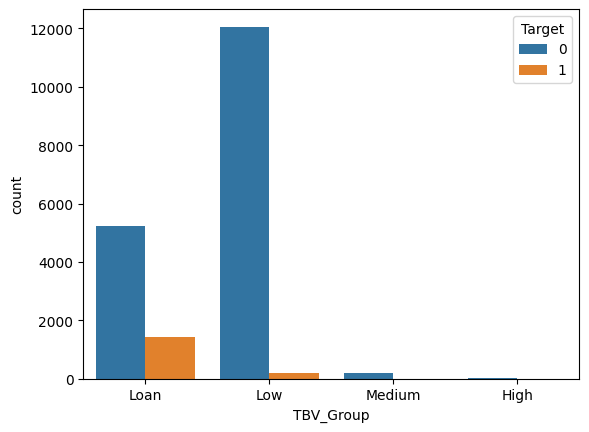

In [ ]:
sns.countplot(data=df, x='TBV_Group', hue='Target')

Insight:Drivers who have taken loans are more likely to churn, indicating that indebted drivers exhibit higher attrition risk.

## Quarterly Rating

<Axes: xlabel='Quarterly Rating', ylabel='count'>

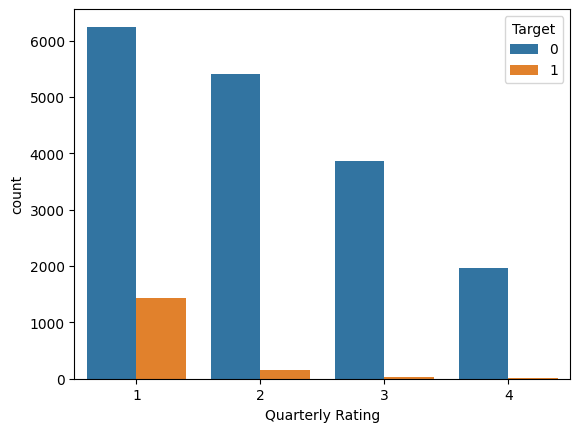

In [ ]:
sns.countplot(data=df, x='Quarterly Rating', hue='Target')

Insight: Drivers with poor quarterly ratings are more likely to churn, indicating a strong link between performance and attrition.

Quarterly Rating
1    8.236369e+04
2    5.353634e+05
3    9.358211e+05
4    1.856685e+06
Name: Total Business Value, dtype: float64


/tmp/ipython-input-2480918446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tbv_by_rating.index, y=avg_tbv_by_rating.values, palette='viridis')


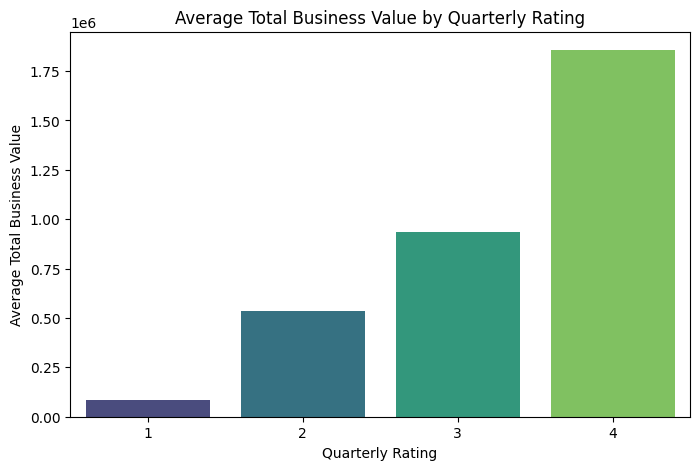

In [ ]:
avg_tbv_by_rating = df.groupby('Quarterly Rating')['Total Business Value'].mean().sort_index()
print(avg_tbv_by_rating)
plt.figure(figsize=(8,5))
sns.barplot(x=avg_tbv_by_rating.index, y=avg_tbv_by_rating.values, palette='viridis')

plt.title("Average Total Business Value by Quarterly Rating")
plt.xlabel("Quarterly Rating")
plt.ylabel("Average Total Business Value")
plt.show()

There is a clear positive relationship between quarterly rating and total business value. Drivers with higher ratings generate significantly more business, highlighting the importance of performance-based incentives and retention strategies for top performers.

## Tenure_Days

In [ ]:
df['Tenure_Group'] = pd.cut(df['Tenure_Days'], bins=[0, 30, 90, 180, 365, 730, 1095, df['Tenure_Days'].max()],
                            labels=['0-30', '31-90', '91-180', '181-365', '1-2Y', '2-3Y', '3Y+'])

grouped = df.groupby('Tenure_Group', observed=False)['Target'].sum()

/tmp/ipython-input-1928042944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=grouped.index, x=grouped.values, palette='Set2')


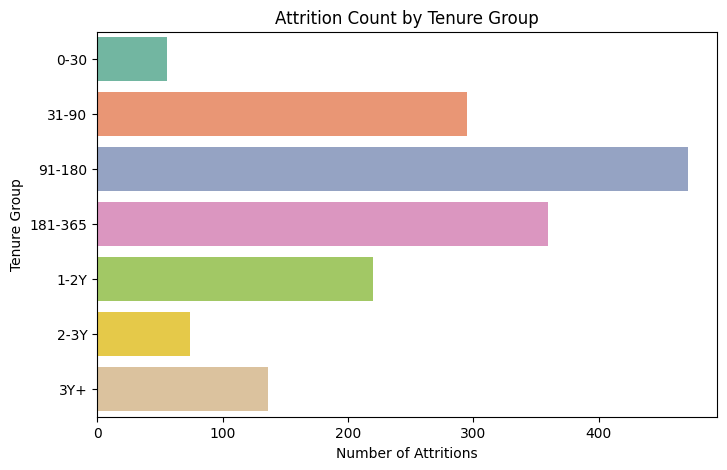

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y=grouped.index, x=grouped.values, palette='Set2')
plt.title("Attrition Count by Tenure Group")
plt.xlabel("Number of Attritions")
plt.ylabel("Tenure Group")
plt.show()

**Lower tenure → higher attrition:**

*  The **highest attrition** is observed in the **91–180 days** range, with 471 drivers leaving.
*  The **second highest** occurs in the **181–365** days range, with 360 drivers leaving.


*  This **trend suggests** that drivers are more prone to leave after **3 to 12 months of employment—possibly** due to job dissatisfaction, unmet expectations, or lack of engagement during the post-onboarding phase.

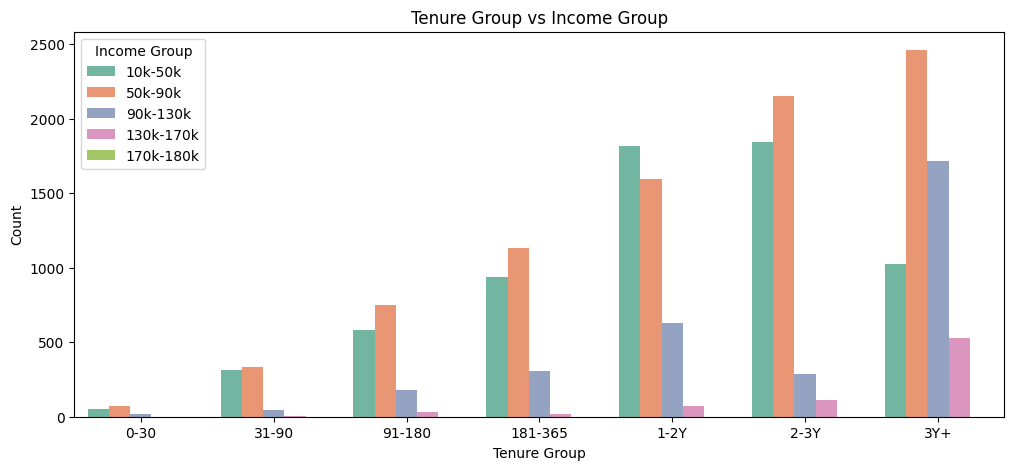

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Tenure_Group', hue='Income_Group', data=df, palette='Set2')
plt.title('Tenure Group vs Income Group')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.legend(title='Income Group')
plt.show()

Insights: As the Tenure Days Increases.There is significant increase in Total Business Value

## correlation analysis

<Axes: >

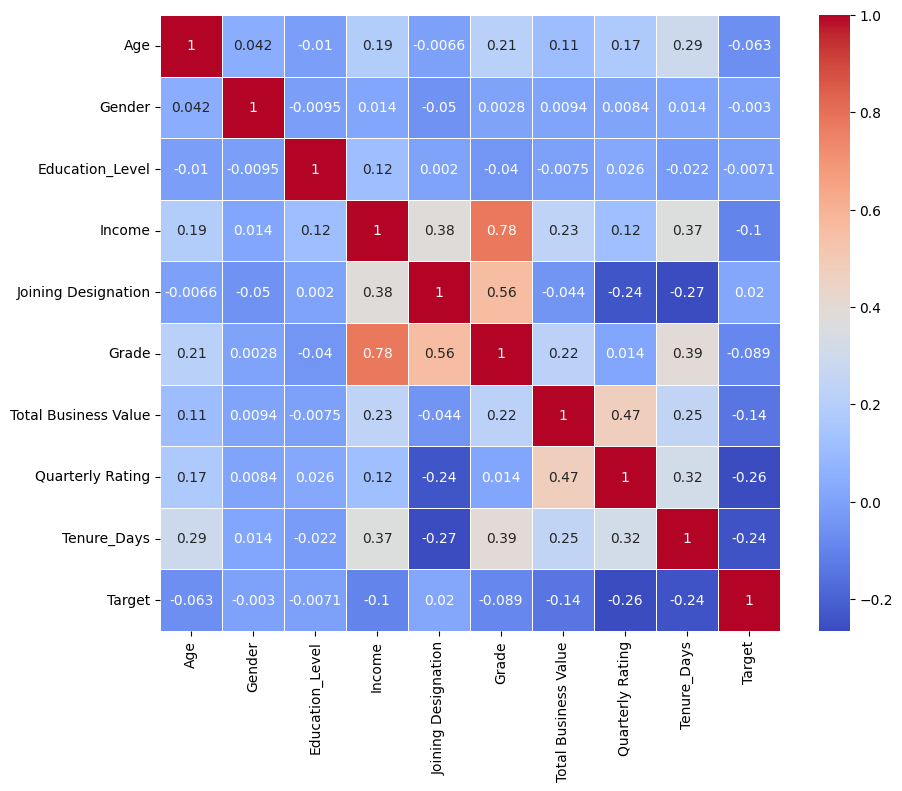

In [ ]:
numeric_df=df.select_dtypes(include='number')
corr=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=0.5)

Target Correlation (Attrition)

Tenure_Days (-0.24) → Strongest negative correlation. Drivers with longer tenure are less likely to leave (matches the boxplot you showed earlier).

Quarterly Rating (-0.26) → Higher performance/ratings are linked with lower attrition.

Total Business Value (-0.14) → Drivers contributing more business tend to stay longer.

Income (-0.10) → Slightly negative, meaning higher income is mildly linked with lower attrition.

Other variables (Age, Education, Gender, etc.) show very weak or no correlation with attrition.

Most important predictors for Target are: Tenure_Days, Quarterly Rating, and Total Business Value.

Feature Relationships

Income & Grade (0.78) → Very highly correlated, meaning higher grades come with higher income.

Joining Designation & Grade (0.56) → Strong positive correlation (designation at joining aligns with grade).

Quarterly Rating & Total Business Value (0.47) → Good performers generate more business.

Age & Tenure_Days (0.29) → Older drivers tend to have longer tenure.

## Outlier detection and treatment

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   19104 non-null  int64   
 1   Gender                19104 non-null  int64   
 2   City                  19104 non-null  object  
 3   Education_Level       19104 non-null  int64   
 4   Income                19104 non-null  int64   
 5   Joining Designation   19104 non-null  int64   
 6   Grade                 19104 non-null  int64   
 7   Total Business Value  19104 non-null  int64   
 8   Quarterly Rating      19104 non-null  int64   
 9   Tenure_Days           19104 non-null  int64   
 10  Target                19104 non-null  int64   
 11  Age_Group             19104 non-null  category
 12  Income_Group          19080 non-null  category
 13  TBV_Group             19102 non-null  category
 14  Tenure_Group          19042 non-null  category
dtypes:

In [ ]:
numeric_cols =['Age','Income','Total Business Value']

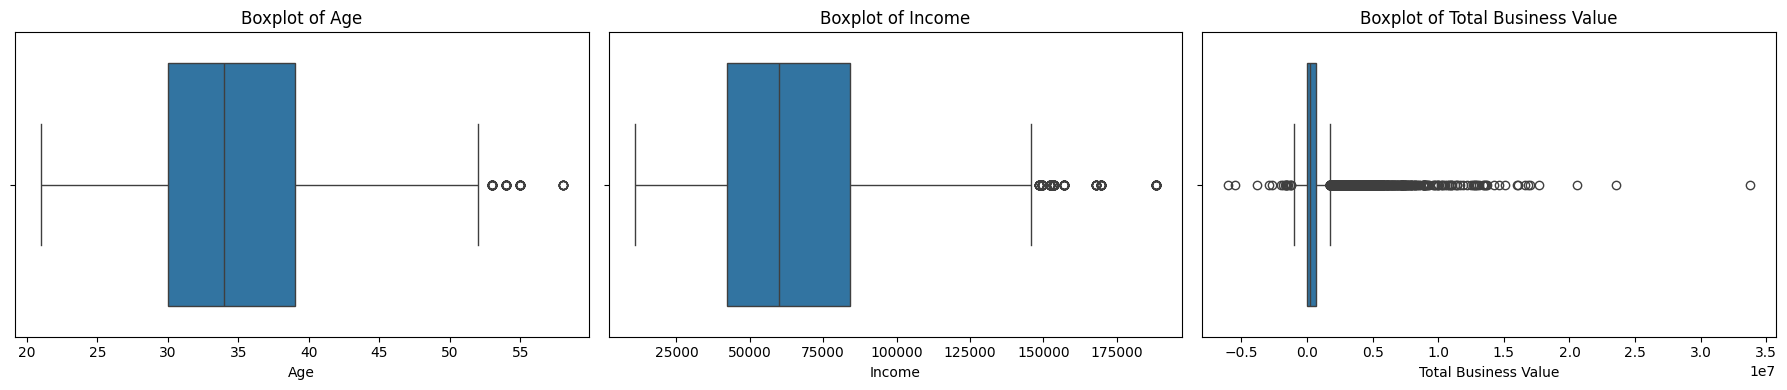

In [ ]:
for i in range(0, len(numeric_cols), 3):
    subset = numeric_cols[i:i+3]
    fig, axes = plt.subplots(1, len(subset), figsize=(6*len(subset), 4))

    if len(subset) == 1:
        axes = [axes]

    for ax, col in zip(axes, subset):
        sns.boxplot(x=df[col], ax=ax)
        ax.set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

In [ ]:
outliers_dict = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers
    print(f"{col} → Number of outliers: {outliers.shape[0]}")

Age → Number of outliers: 78
Income → Number of outliers: 188
Total Business Value → Number of outliers: 1371


# Feature Eng

In [ ]:
categorical_cols = ['Gender','Education_Level','Joining Designation','Grade','Quarterly Rating']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df = df.drop(['Age_Group','Income_Group','TBV_Group','Tenure_Group','City'],axis=1)

# Modal Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## LogisticRegression

In [ ]:
# ---------------- KNN Imputation ----------------
numeric_cols = ['Age', 'Income', 'Total Business Value', 'Tenure_Days']
imputer = KNNImputer(n_neighbors=5)

X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

In [ ]:
# ---------------- Scaling ----------------
scaler = StandardScaler()
scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()
scaled_X_train[numeric_cols] = scaler.fit_transform(scaled_X_train[numeric_cols])
scaled_X_train[numeric_cols] = scaler.transform(scaled_X_train[numeric_cols])

scaled_X_train[numeric_cols] = scaler.fit_transform(scaled_X_train[numeric_cols])
scaled_X_test[numeric_cols] = scaler.transform(scaled_X_test[numeric_cols])

# ---------- Logistic Regression ----------
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(scaled_X_train, y_train)

# ---------- Prediction & Evaluation ----------
y_pred = lr.predict(scaled_X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7113321120125622

Confusion Matrix:
 [[2438 1060]
 [  43  280]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82      3498
           1       0.21      0.87      0.34       323

    accuracy                           0.71      3821
   macro avg       0.60      0.78      0.58      3821
weighted avg       0.92      0.71      0.78      3821



Since the model struggles to detect driver attrition due to small amount of data, applying SMOTE to generate synthetic samples can help balance the dataset and improve prediction performance

In [ ]:
# ---------- Apply SMOTE ----------
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(scaled_X_train, y_train)

# ---------- Logistic Regression ----------
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_balanced, y_train_balanced)

# ---------- Prediction & Evaluation ----------
y_pred = lr.predict(scaled_X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9133734624443863

Confusion Matrix:
 [[3484   14]
 [ 317    6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.95      3498
           1       0.30      0.02      0.03       323

    accuracy                           0.91      3821
   macro avg       0.61      0.51      0.49      3821
weighted avg       0.86      0.91      0.88      3821



# Model Evaluation Summary

- **Accuracy:** 91.3% (looks good overall but misleading)

## Confusion Matrix
- TN: 3484 | FP: 14  
- FN: 317  | TP: 6  

## Class-wise Performance
- **Class 0:** Very strong (Precision 0.92, Recall 1.00, F1 0.95)  
- **Class 1:** Very poor (Precision 0.30, Recall 0.02, F1 0.03)  

## Insight
- Model almost **ignores minority class (1)** → catches only 6 out of 323 positives.  
- High accuracy is due to **class imbalance** (dominated by class 0).  

## Next Steps
- Apply **class balancing** (SMOTE, class weights, oversampling).  
- Consider **threshold tuning** or **different model** to improve recall for class 1.  
- Use **AUC-ROC / PR curve** for fairer evaluation.  


## Random Forest

In [ ]:
# ---------- Apply SMOTE ----------
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# ---------- Random Forest ----------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# ---------- Prediction & Evaluation ----------
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9468725464538079

Confusion Matrix:
 [[3431   67]
 [ 136  187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3498
           1       0.74      0.58      0.65       323

    accuracy                           0.95      3821
   macro avg       0.85      0.78      0.81      3821
weighted avg       0.94      0.95      0.94      3821



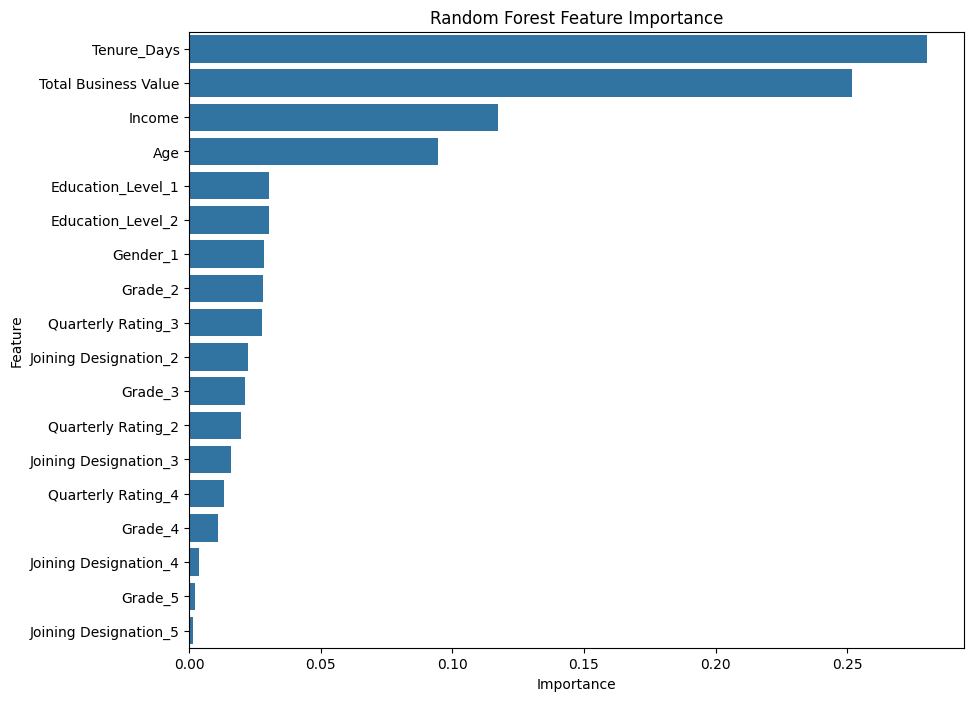

In [ ]:
# Get feature importance for Random Forest
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train_balanced.columns)
rf_feature_importance = rf_feature_importance.sort_values(ascending=False)

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 8))
sns.barplot(x=rf_feature_importance.values, y=rf_feature_importance.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

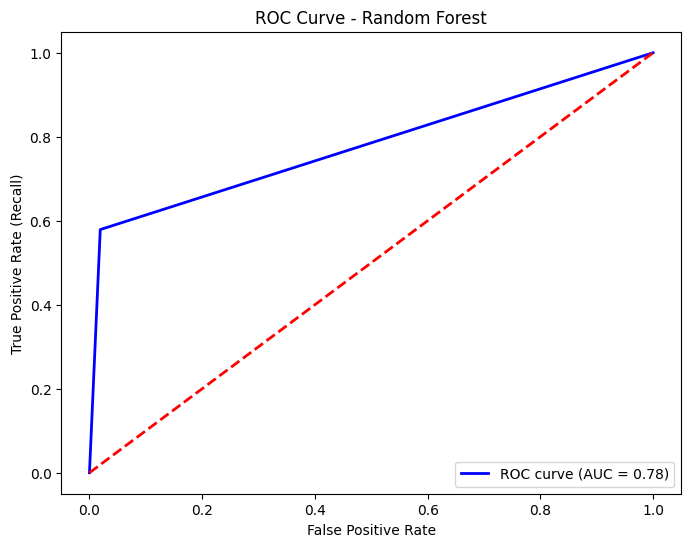

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


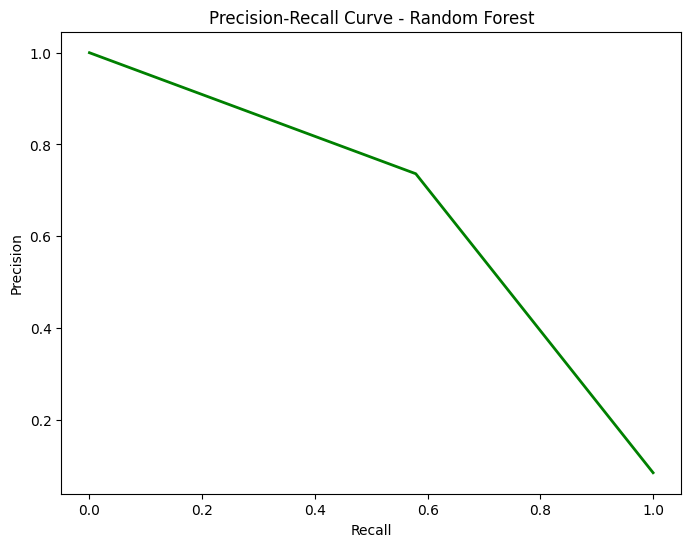

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.show()


# Model Evaluation Summary

- **Accuracy:** 94.7% (very high overall)

## Confusion Matrix
- TN: 3431 | FP: 67  
- FN: 136  | TP: 187  

## Class-wise Performance
- **Class 0:** Excellent (Precision 0.96, Recall 0.98, F1 0.97)  
- **Class 1:** Moderate (Precision 0.74, Recall 0.58, F1 0.65)  

## Insight
- Model favors majority class (0).  
- Struggles with minority class (1), especially recall (misses many positives).  

## Next Steps
- Handle class imbalance (SMOTE, class weights, resampling).  
- Tune threshold to improve recall for class 1.  

## XGBoost

In [ ]:
# ---------- Apply SMOTE ----------
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# ---------- XGBoost Classifier ----------
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)

# ---------- Prediction & Evaluation ----------
y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:07:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9005495943470295

Confusion Matrix:
 [[3239  259]
 [ 121  202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      3498
           1       0.44      0.63      0.52       323

    accuracy                           0.90      3821
   macro avg       0.70      0.78      0.73      3821
weighted avg       0.92      0.90      0.91      3821



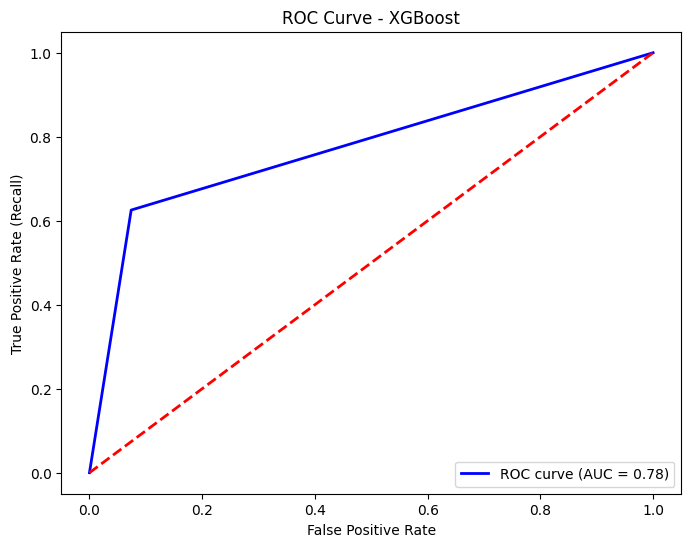

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

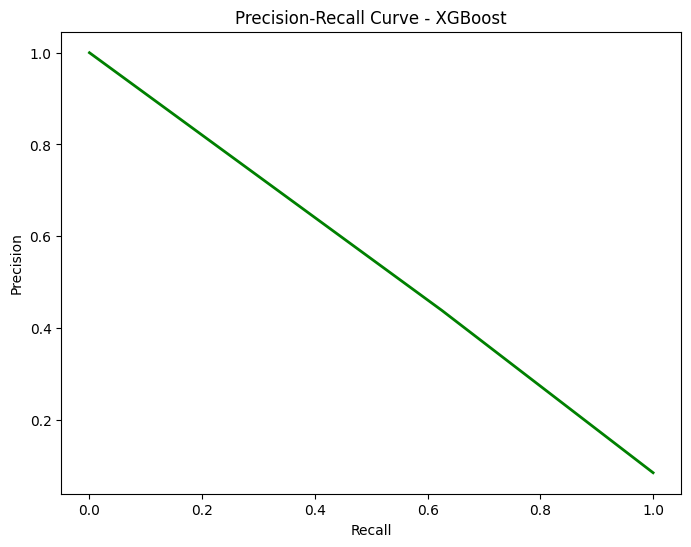

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color="green", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.show()

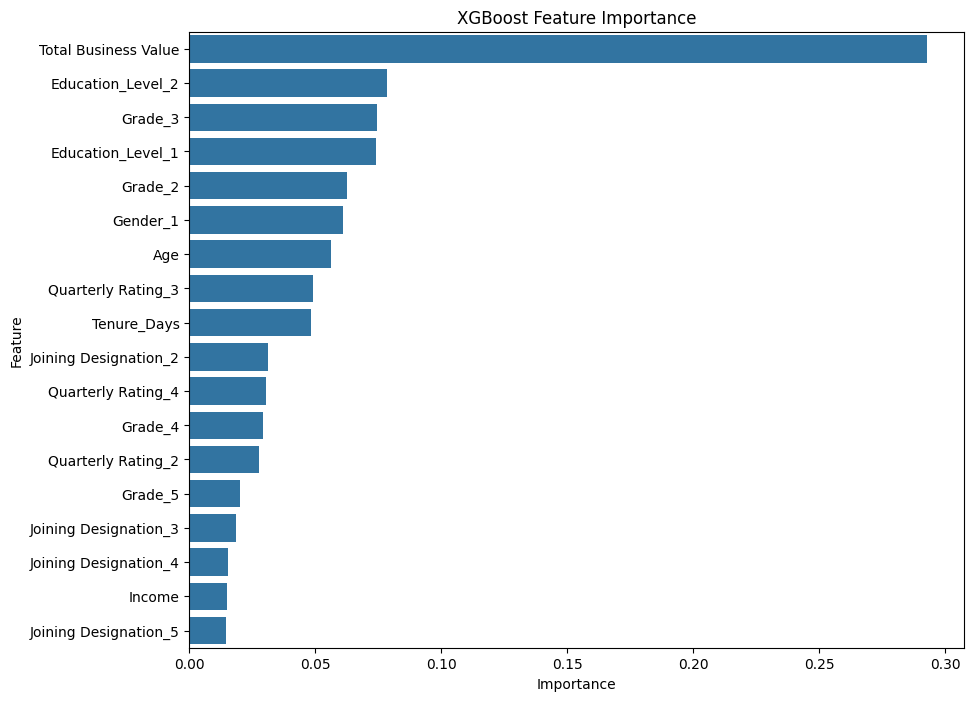

In [ ]:
# Get feature importance for XGBoost
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, index=X_train_balanced.columns)
xgb_feature_importance = xgb_feature_importance.sort_values(ascending=False)

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 8))
sns.barplot(x=xgb_feature_importance.values, y=xgb_feature_importance.index)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Model Evaluation Summary

- **Accuracy:** 90.1% (slightly lower but more balanced)

## Confusion Matrix
- TN: 3239 | FP: 259  
- FN: 121  | TP: 202  

## Class-wise Performance
- **Class 0:** Strong (Precision 0.96, Recall 0.93, F1 0.94)  
- **Class 1:** Improved (Precision 0.44, Recall 0.63, F1 0.52)  

## Insight
- Better detection of minority class (1) compared to earlier models.  
- Sacrificed some overall accuracy but **recall for class 1 is much stronger (63%)**.  
- More balanced trade-off between classes.  

## Next Steps
- Further **tune threshold** to improve precision vs. recall trade-off.  
- Keep experimenting with **resampling or class weighting** to reduce false positives.  


# Model Selection And Insights
### Model Selection Strategy

- **Primary Model:** Random Forest  
  - Reason: High overall accuracy (~94%) and balanced precision-recall for both classes.  
  - Use case: Reliable day-to-day predictions for driver attrition with fewer false alarms.

- **Backup / Secondary Model:** XGBoost  
  - Reason: High recall (~0.75) for the minority class (drivers leaving), ensures potential attritions are not missed.  
  - Use case: Acts as a safety net to catch drivers that Random Forest might miss, even at the cost of some false positives.

**Implementation Insight:**  
- Deploy Random Forest for routine predictions.  
- Periodically run XGBoost in parallel or on flagged subsets to ensure high-risk attrition cases are captured.  
- This hybrid approach balances **accuracy, precision, and recall**, optimizing both operational efficiency and retention efforts.


## Conclusion

# Final Conclusion

The analysis of driver attrition reveals that churn is most prevalent among **younger, early-career drivers (ages 21–39)**, those in **lower grades (1–3)**, and those with **shorter tenure (within the first year, especially 91–180 days)**. These groups are typically lower earners, more indebted, and exhibit higher dissatisfaction—making them the most vulnerable to leaving.  

**City-level dynamics** highlight that high driver concentration hubs like **C20, C26, and C27** experience both large workforce inflows and high attrition, showing that scale alone does not ensure stability. In contrast, **C29 and C22** combine high driver volumes with lower churn, suggesting more favorable local conditions. Smaller markets such as **C5, C18, C12, C19, and C11** offer higher average incomes despite fewer drivers, pointing to strong demand–supply advantages.  

**Income emerges as a critical factor**: drivers with lower earnings (₹10,000–₹50,000) are more prone to churn, whereas higher incomes (often linked to senior grades, strong performance, or high-demand cities) reduce attrition risk. Loan-burdened drivers and those with **poor quarterly ratings** are also more likely to leave, while higher ratings strongly correlate with **greater total business value generation**, underscoring the importance of performance and engagement.  

Finally, tenure plays a pivotal role: attrition is concentrated within the **first year of employment**, while drivers who stay longer tend to build higher incomes, attain better grades, and generate significantly more business value—indicating a **clear payoff from effective retention strategies in the early career stage**.  

---

---

## Key Implications

Ola should focus retention strategies on **early-career, lower-grade, loan-burdened, and low-earning drivers** through targeted incentives, faster career progression, and stronger onboarding engagement. At the same time, rewarding **high-performing, long-tenured drivers** will maximize business value and build long-term workforce stability.


# Model Download

In [ ]:
import pickle

# Save the Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the XGBoost model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("Random Forest model saved as random_forest_model.pkl")
print("XGBoost model saved as xgboost_model.pkl")

Random Forest model saved as random_forest_model.pkl
XGBoost model saved as xgboost_model.pkl
